In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#import warnings
#with warnings.catch_warnings():
    #warnings.filterwarnings('ignore')
#from warnings import simplefilter
#simplefilter(action='ignore',category='FutureWarnings')


In [2]:
#Load the data

url="D:\House Prices\House data.csv"
data=pd.read_csv(url)
print(data.head())
print('******************')
print(data.columns)
print('******************')
print(data.describe())
print('******************')
print(data.dtypes)
print('******************')
print(data.shape)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
#Missing value imputation
print(data.isnull().sum())
n_col=data.select_dtypes(include=['int64','float64']).columns
for i in n_col:
    if data[i].isnull().sum()>0:
        data[i]=data[i].fillna(data[i].median())

ob_col=data.select_dtypes(include=['object']).columns
for j in ob_col:
    if data[j].isnull().sum()>0:
        data[j]=data[j].fillna(data[j].mode()[0])

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [4]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

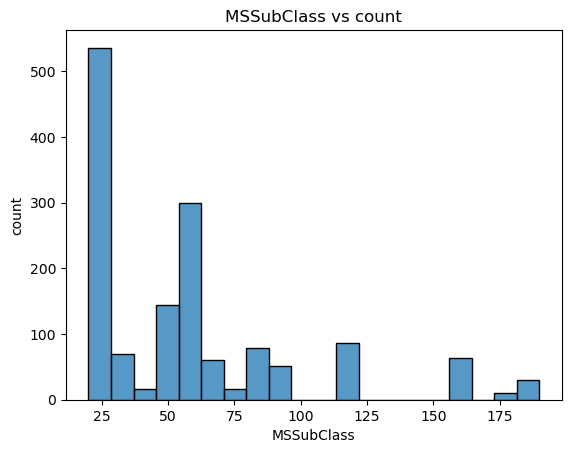

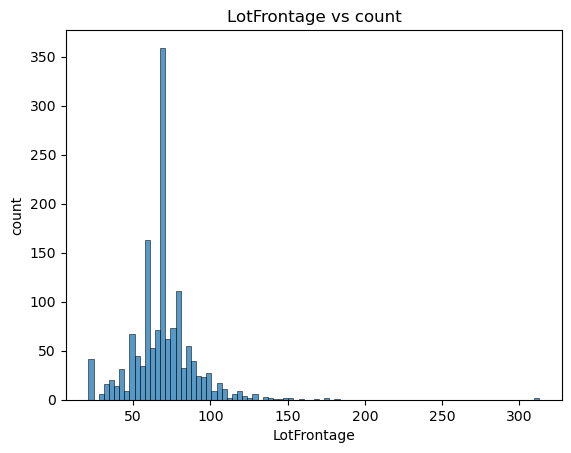

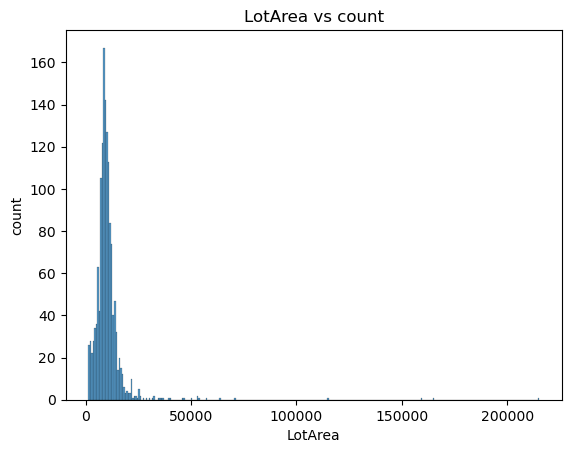

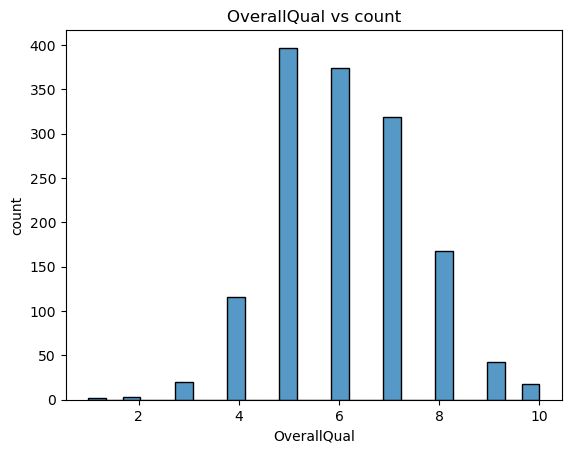

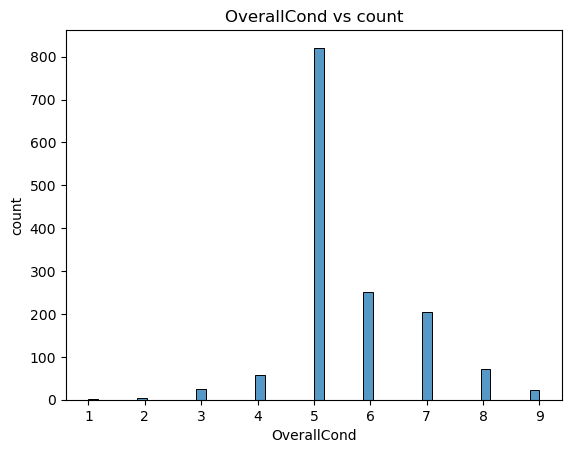

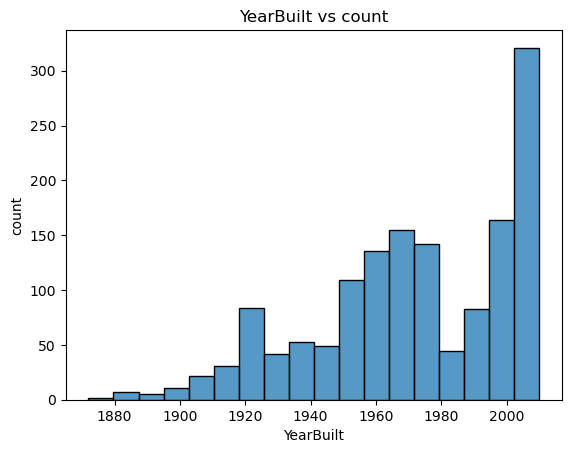

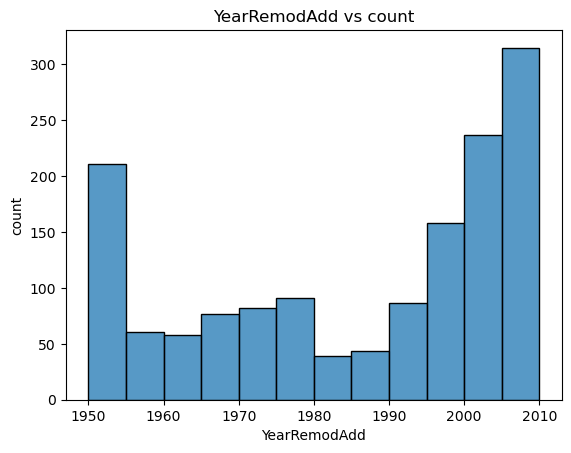

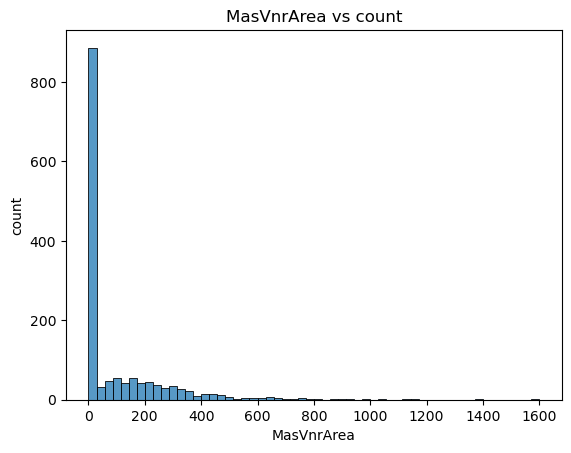

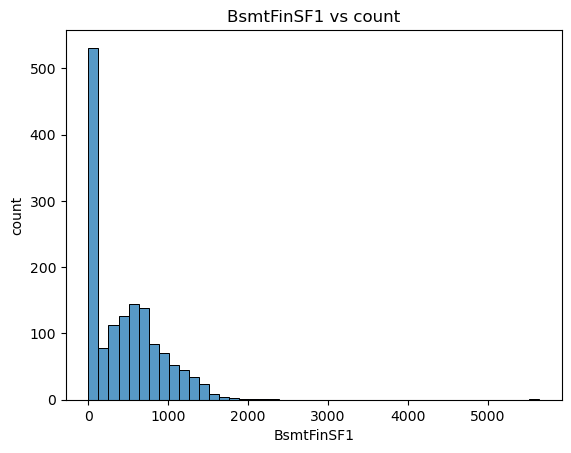

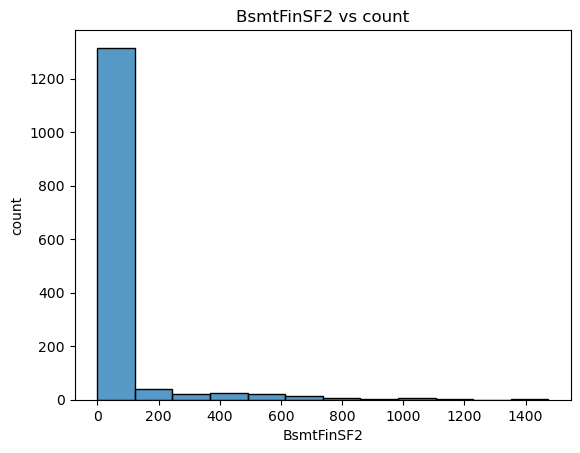

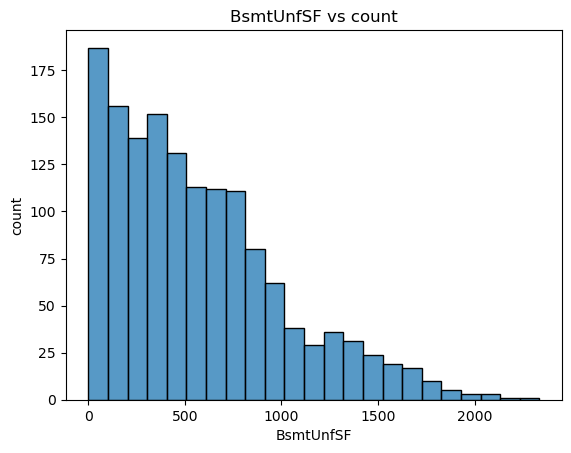

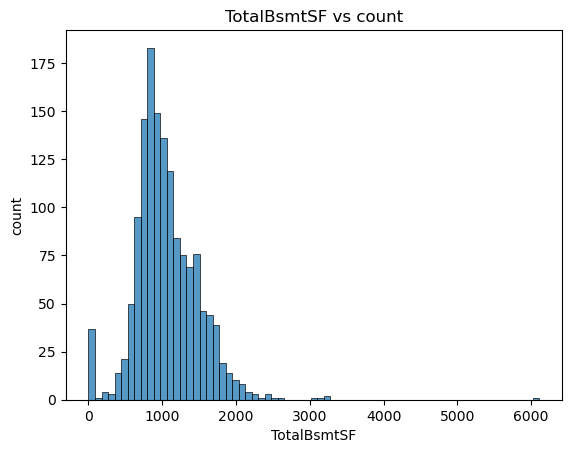

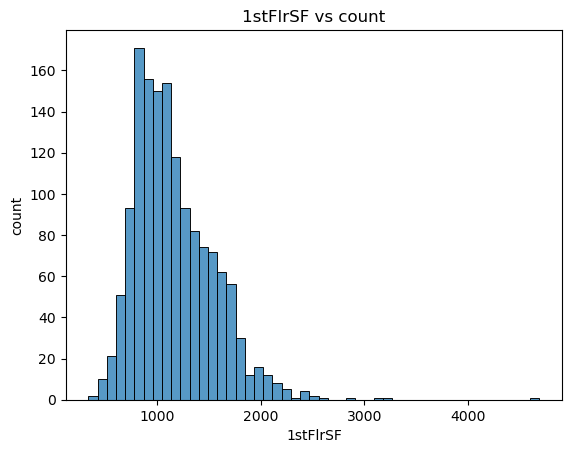

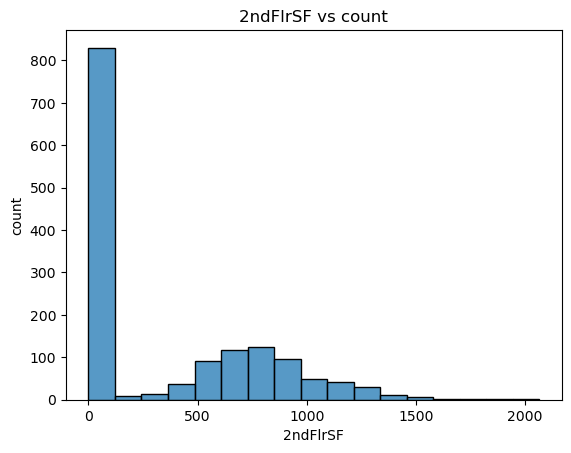

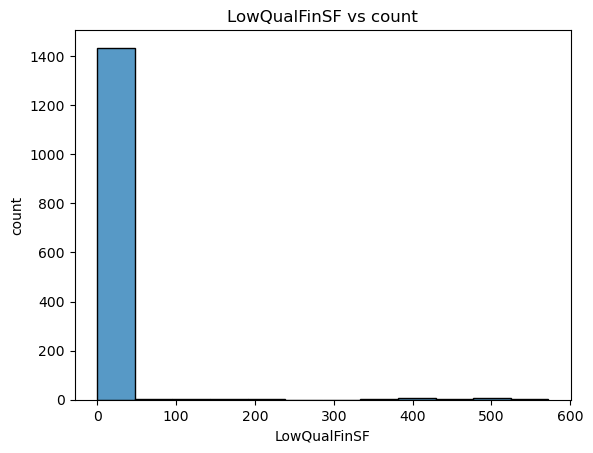

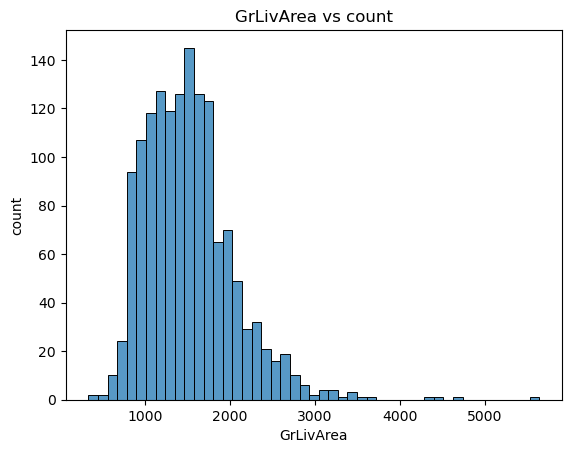

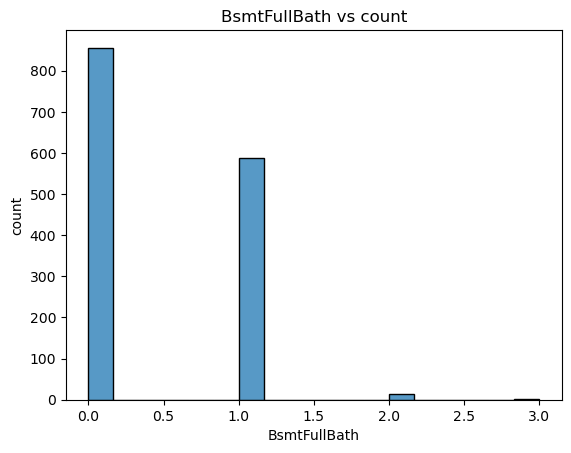

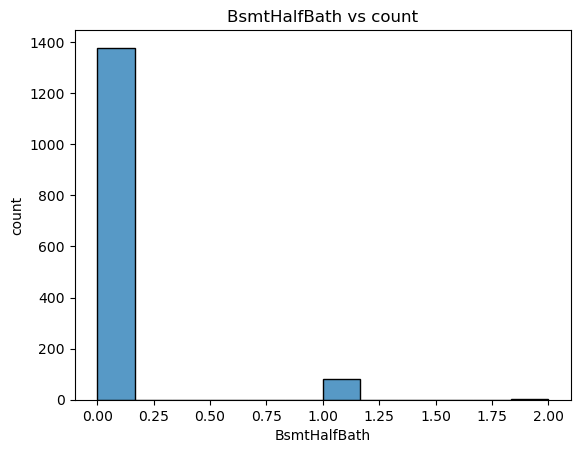

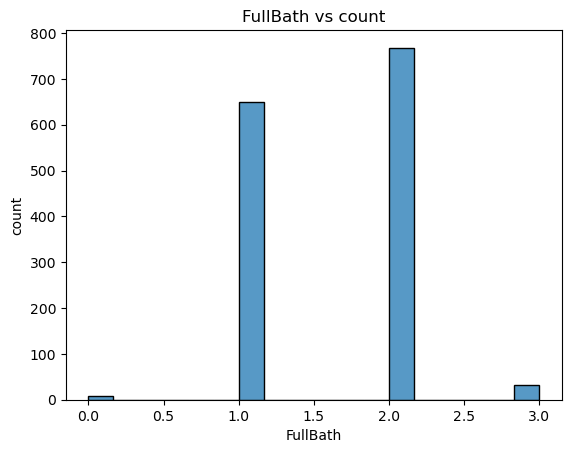

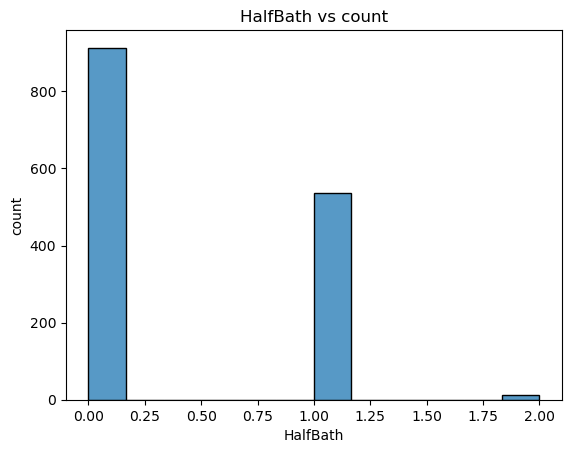

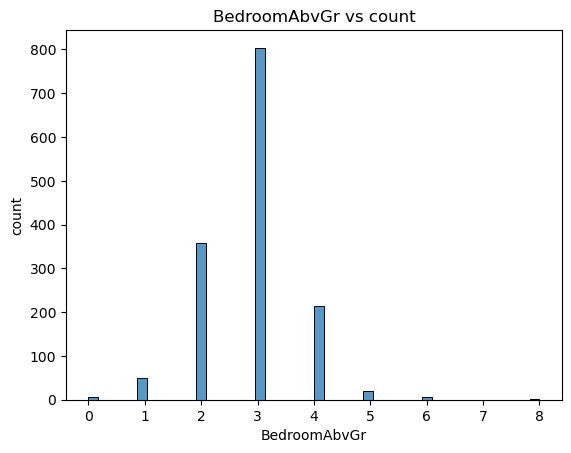

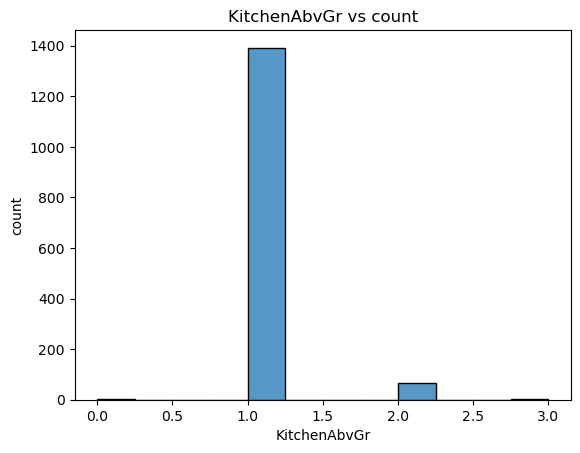

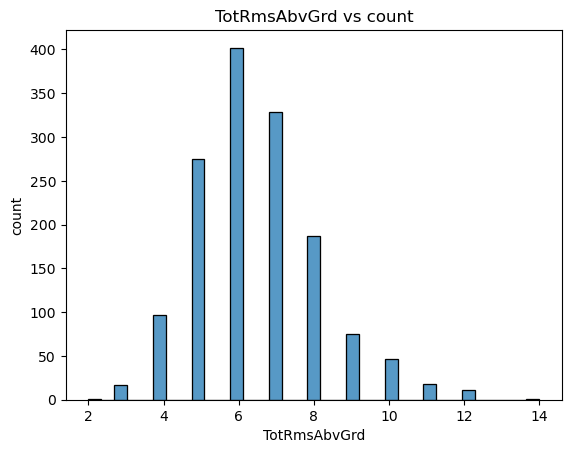

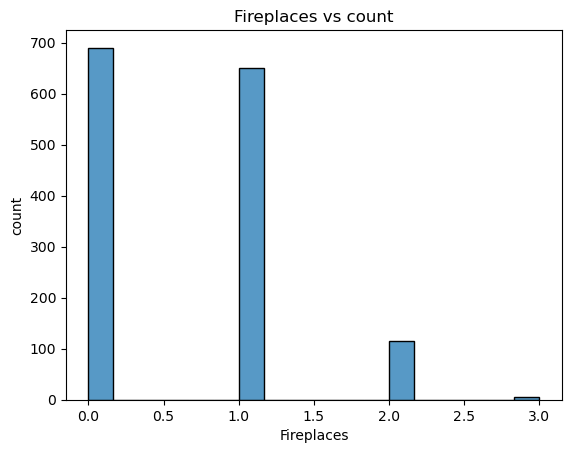

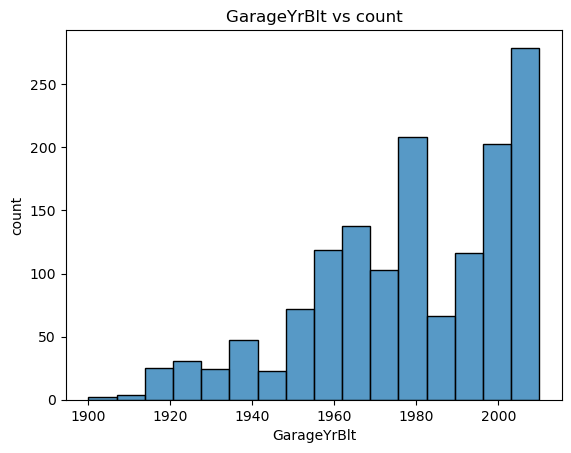

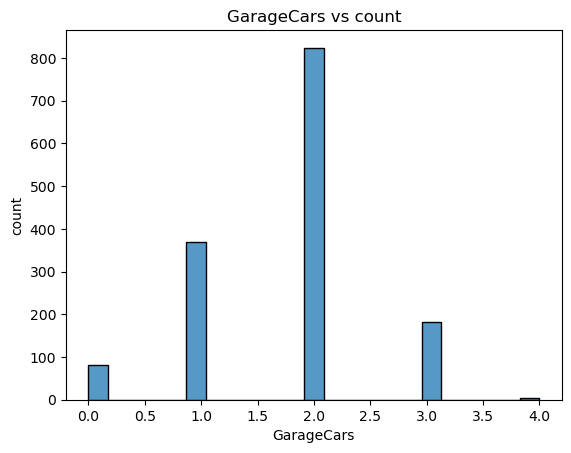

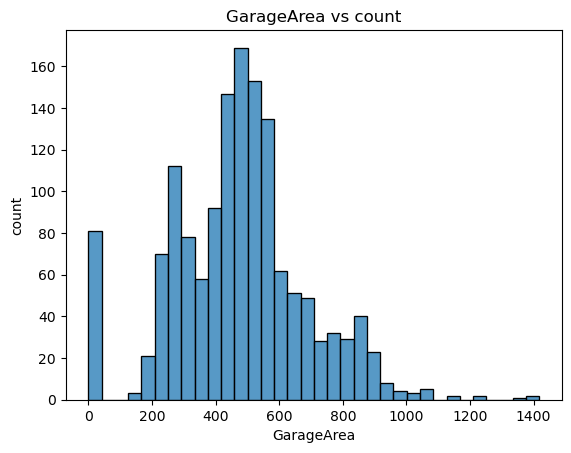

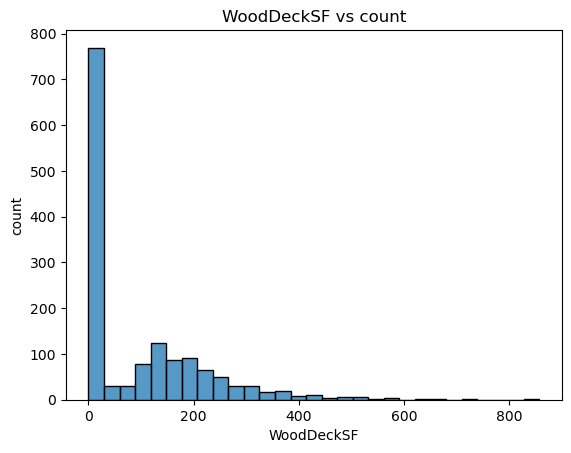

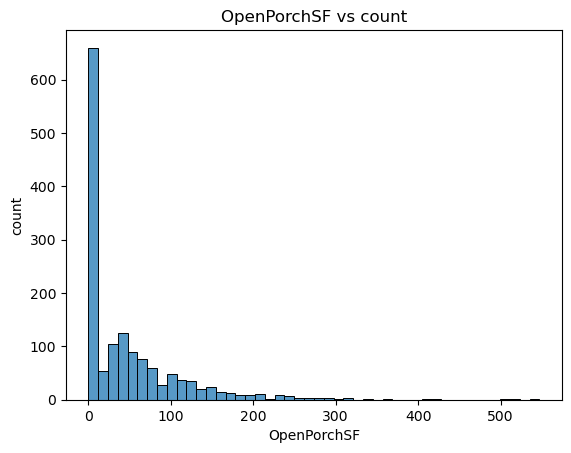

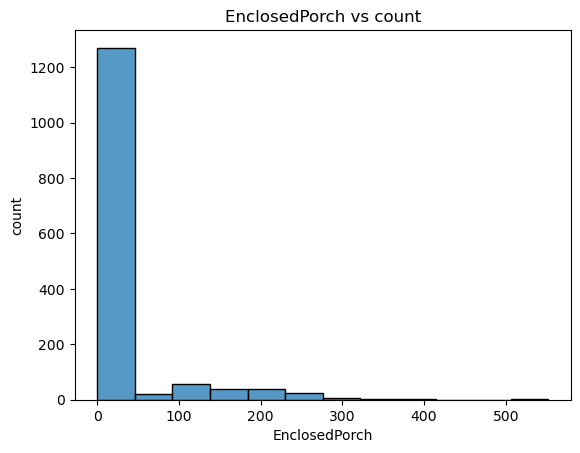

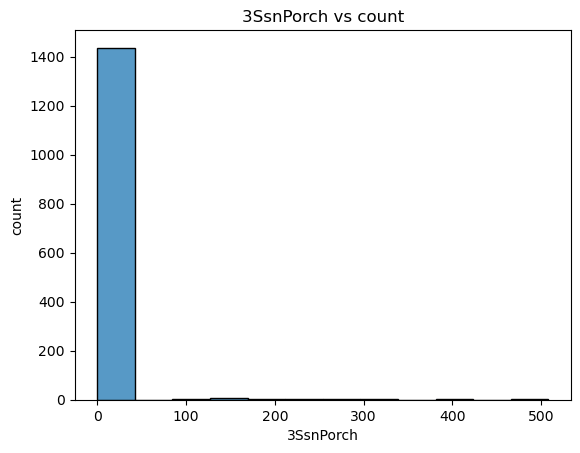

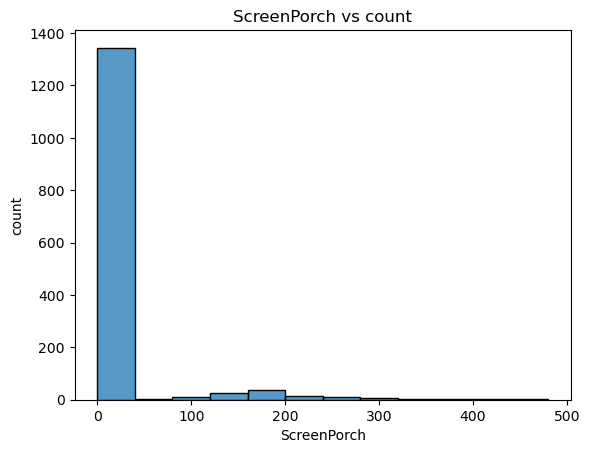

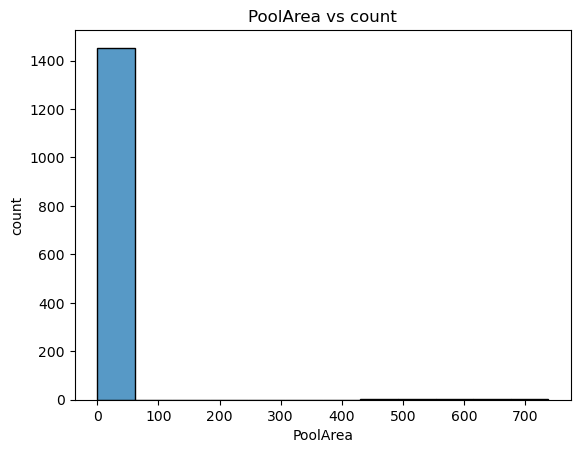

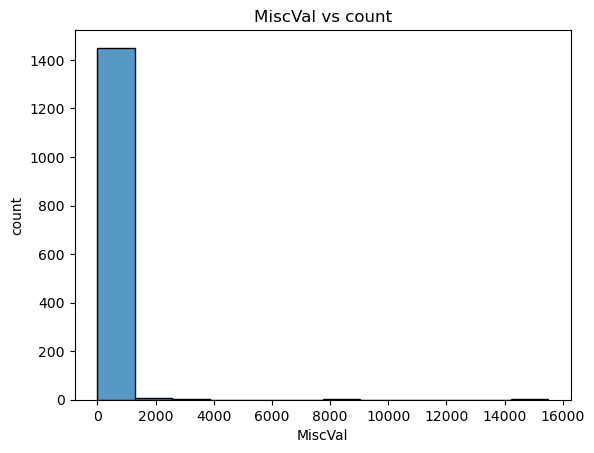

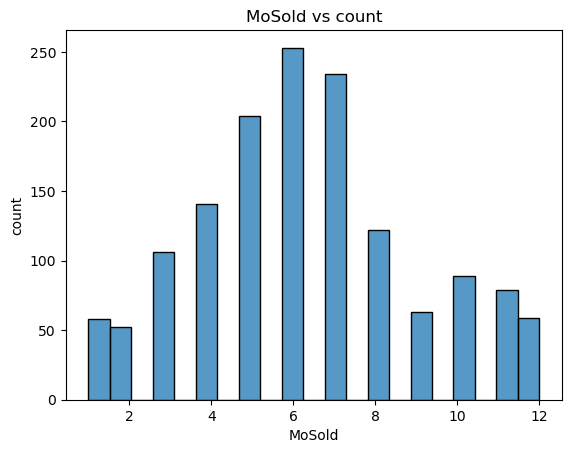

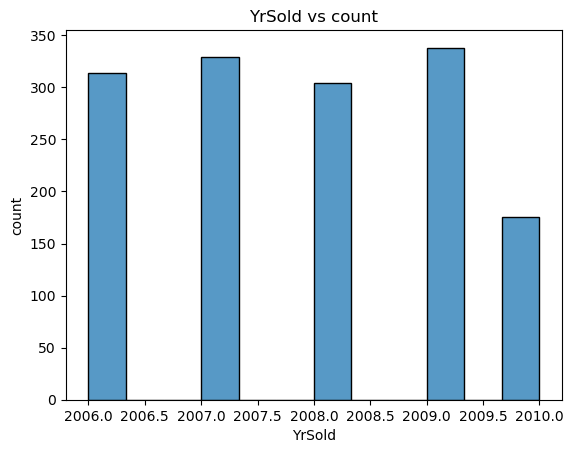

In [5]:
#EDA
num_col=data.select_dtypes(include=['int64','float64']).columns
num_col=num_col.drop(['Id','SalePrice'])
for i in num_col:
    plt.figure()
    sb.histplot(x=i,data=data)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'{i} vs count')
    plt.show()

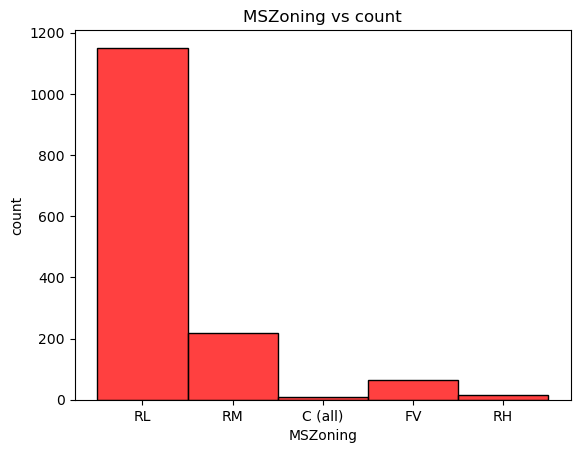

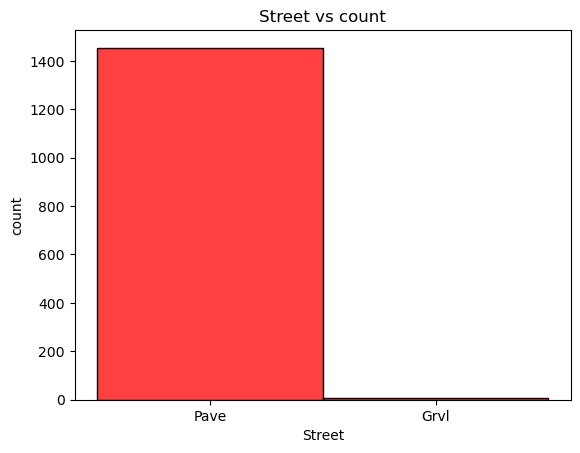

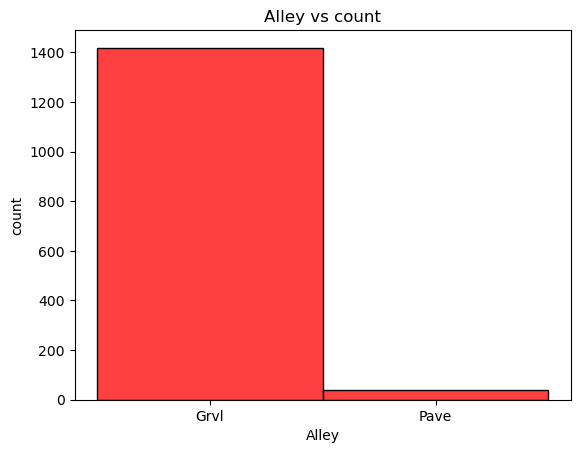

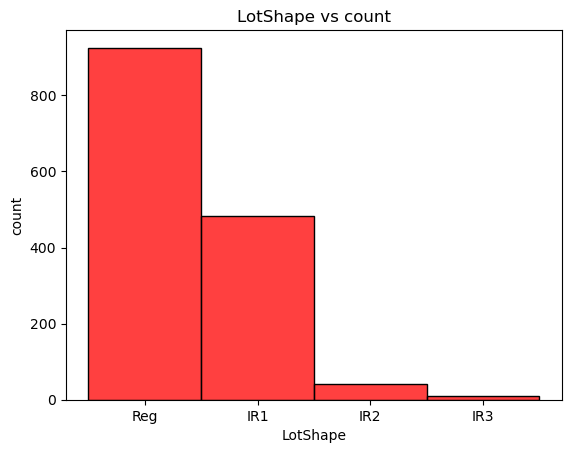

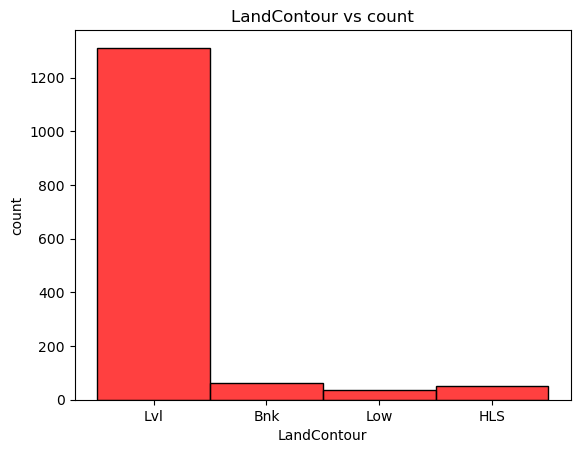

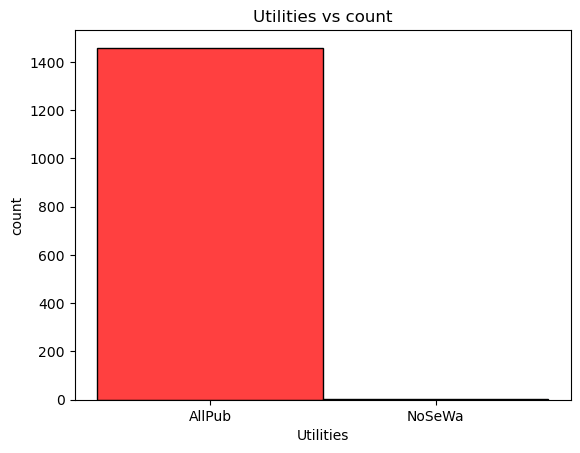

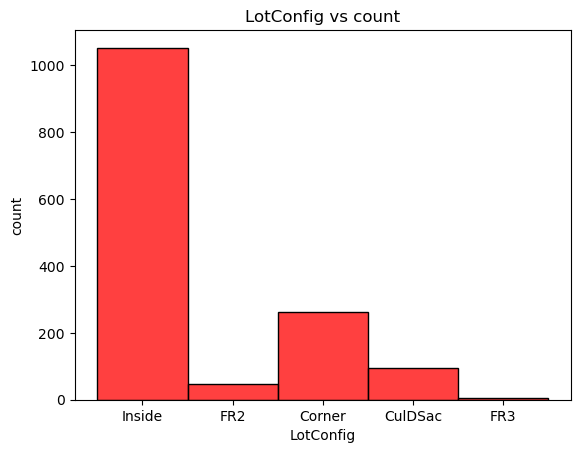

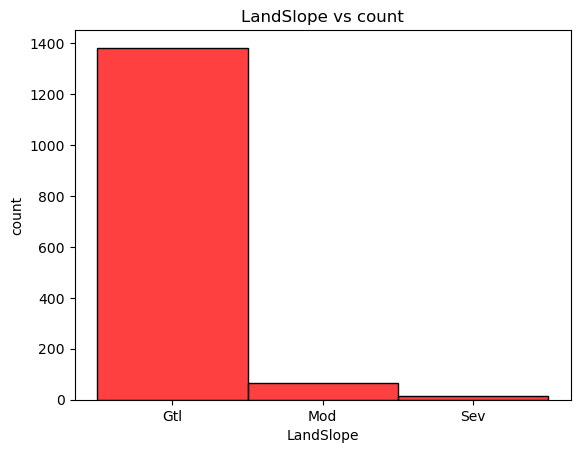

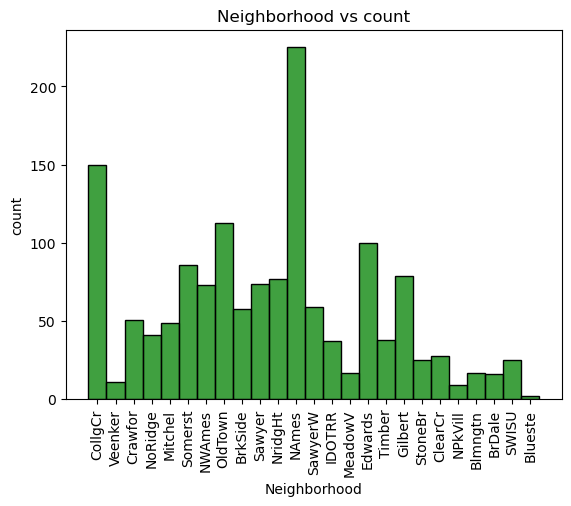

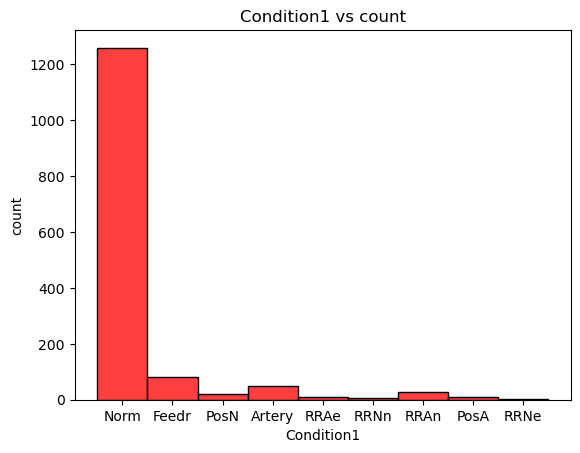

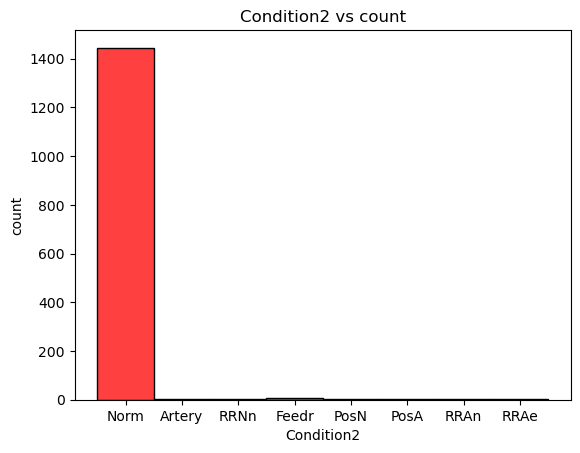

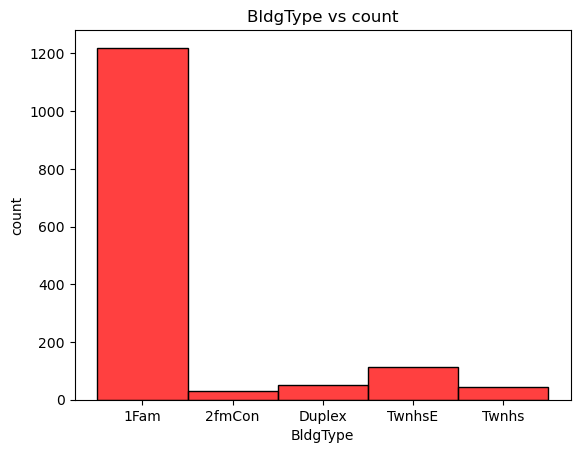

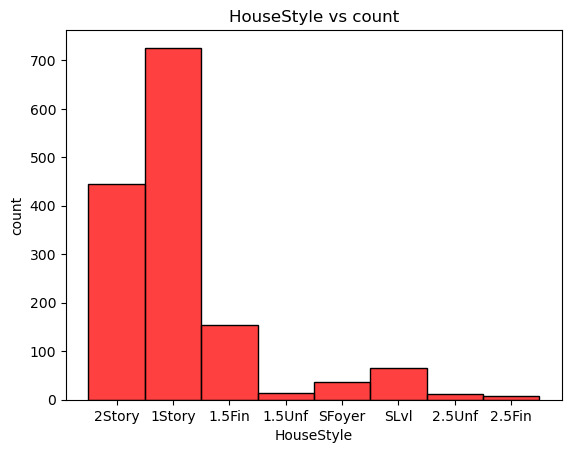

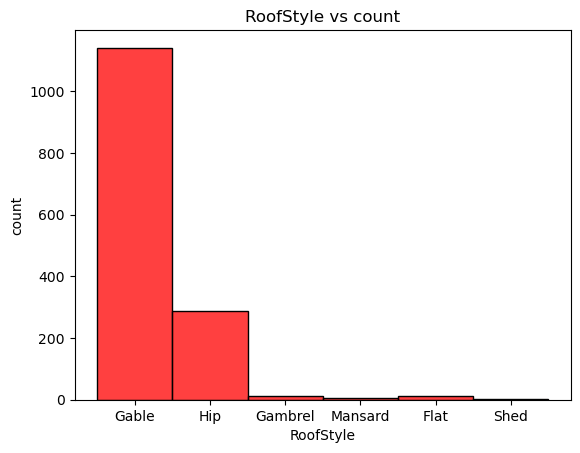

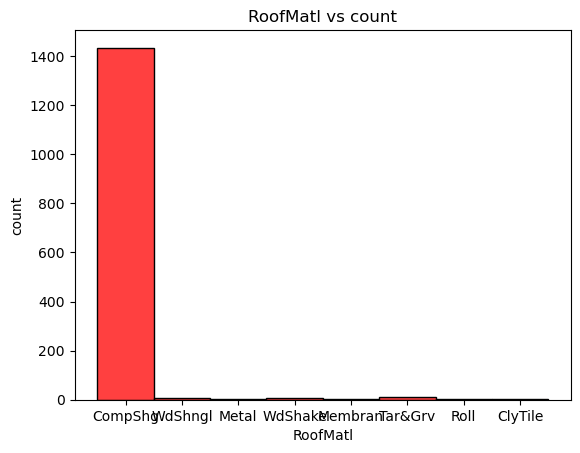

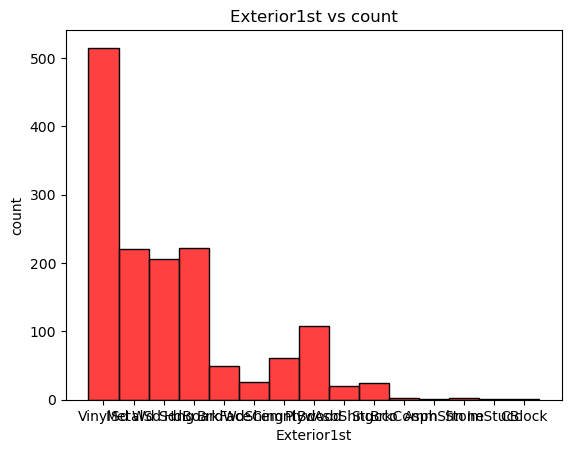

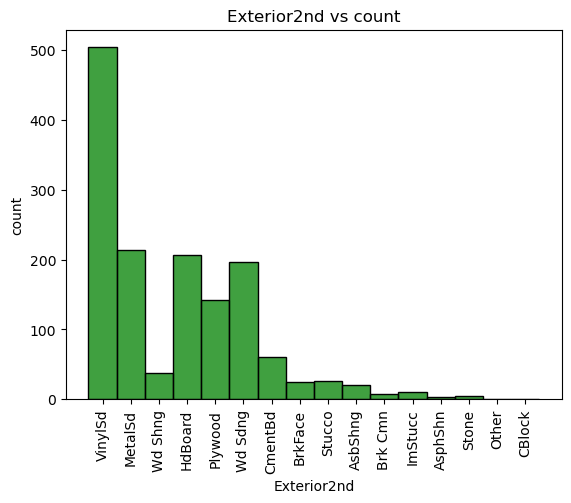

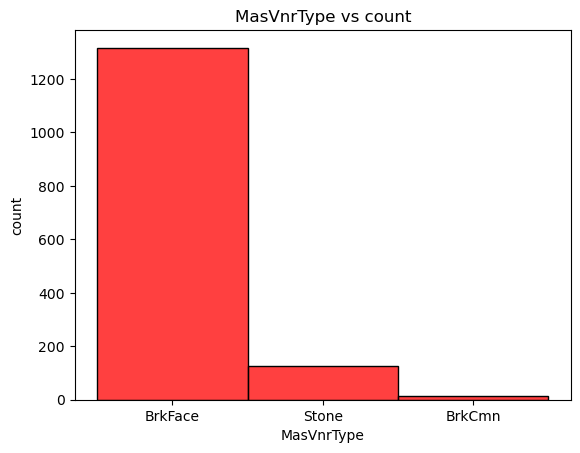

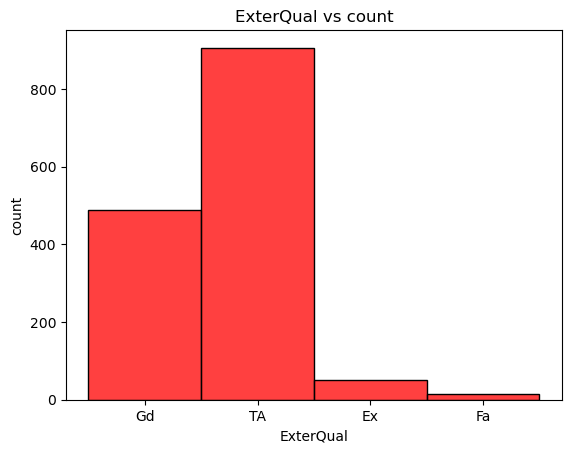

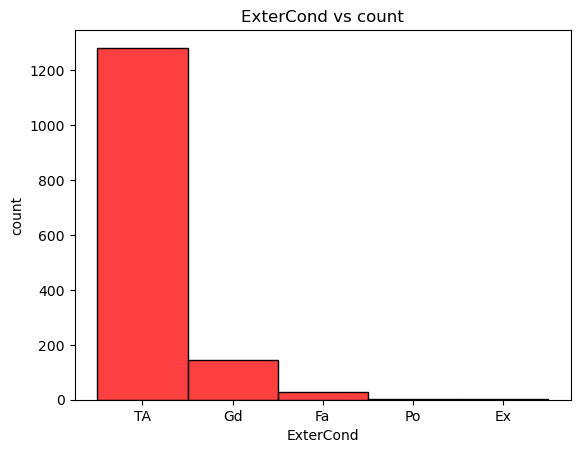

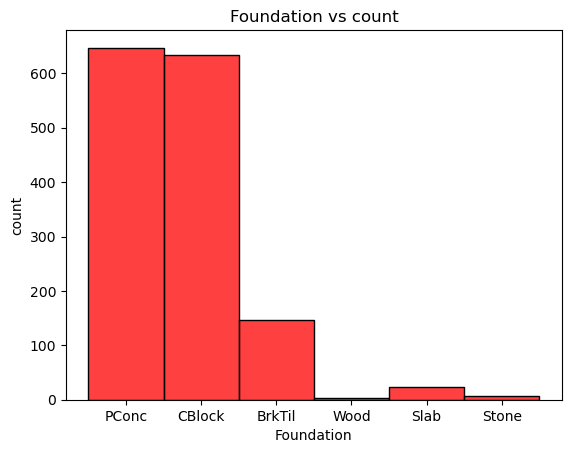

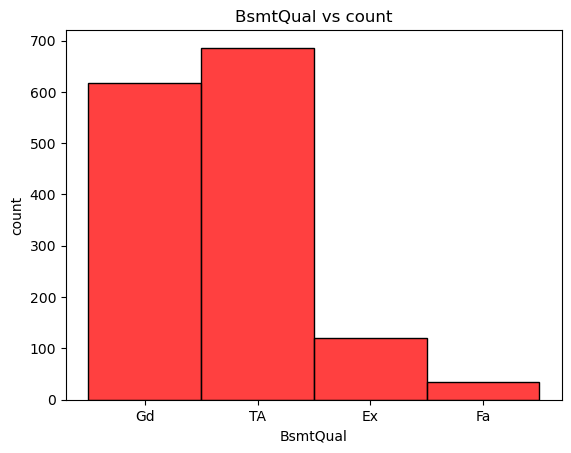

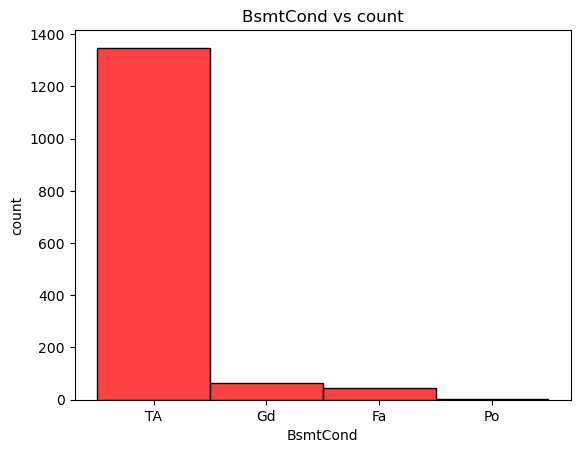

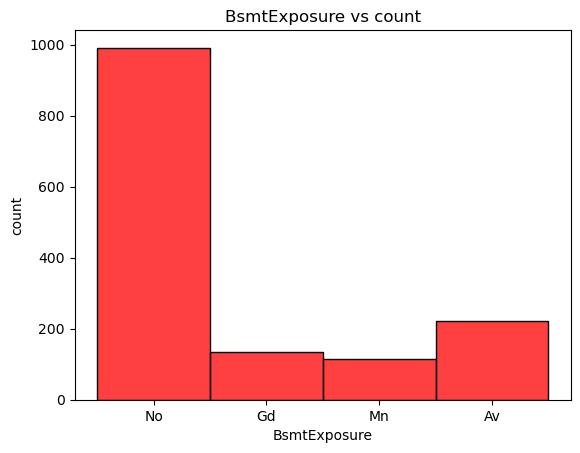

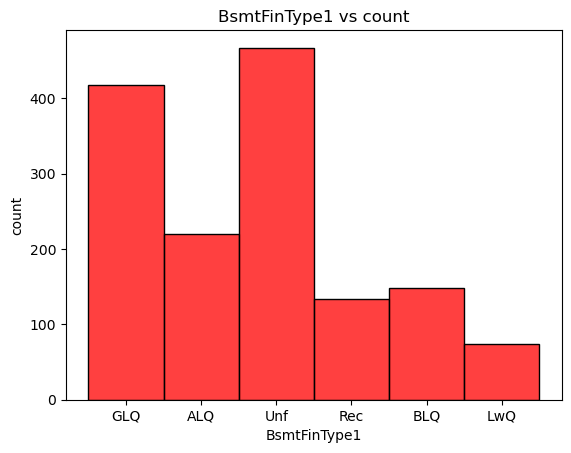

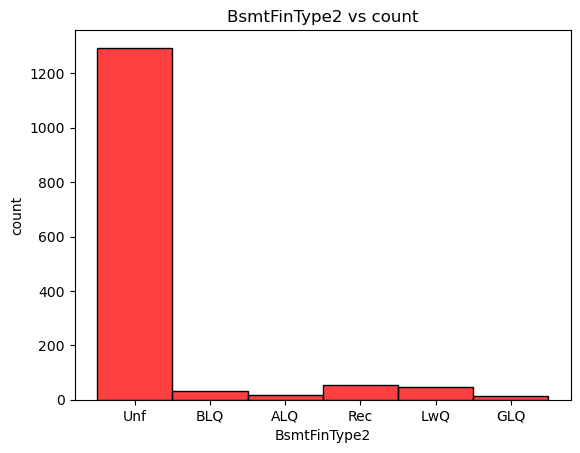

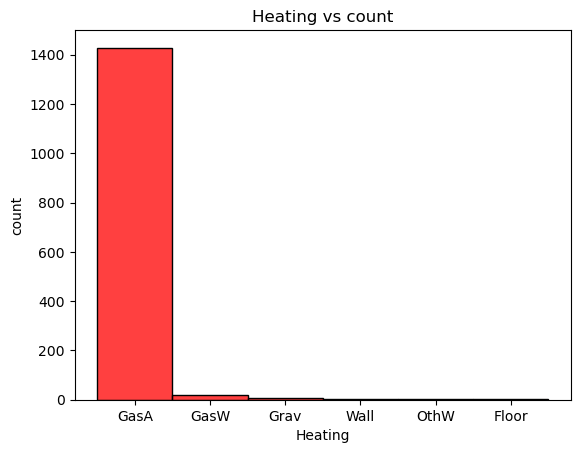

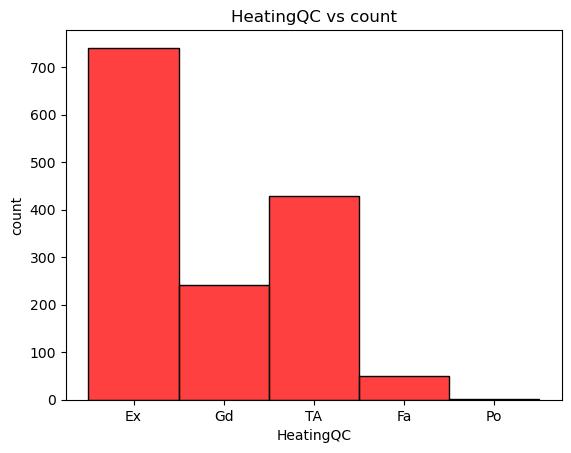

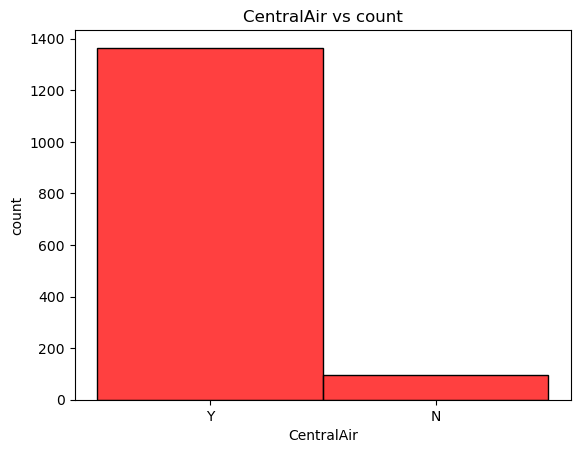

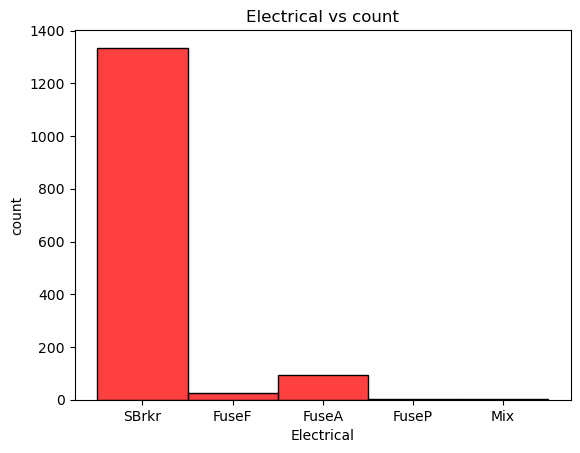

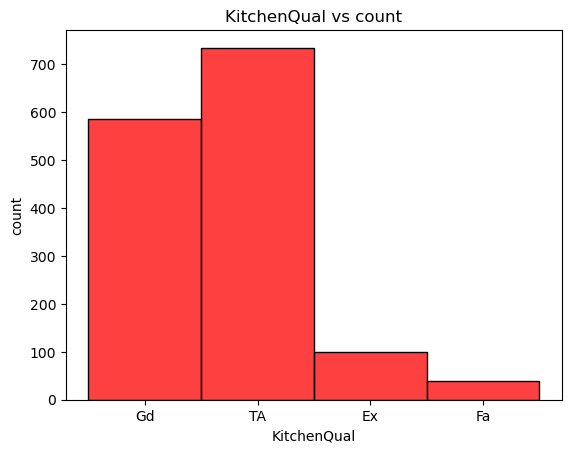

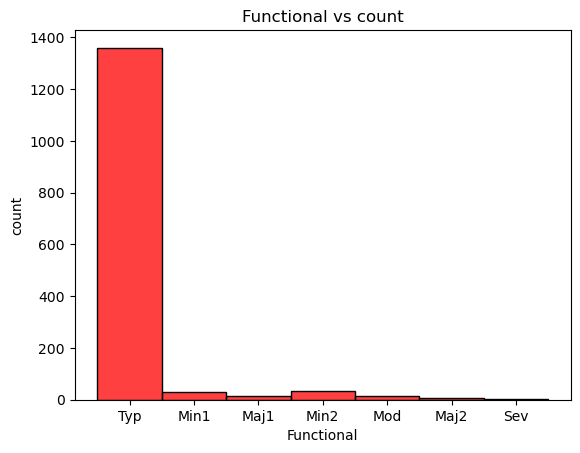

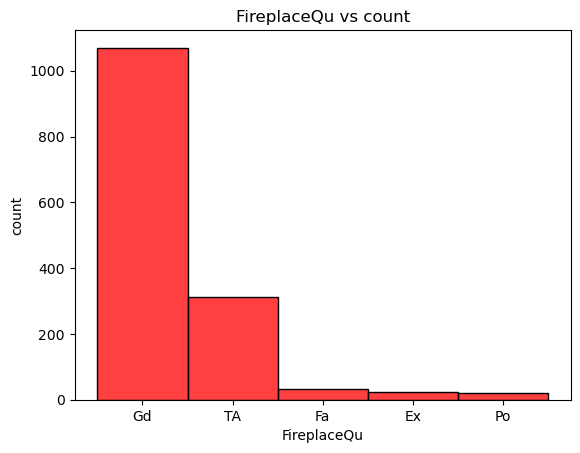

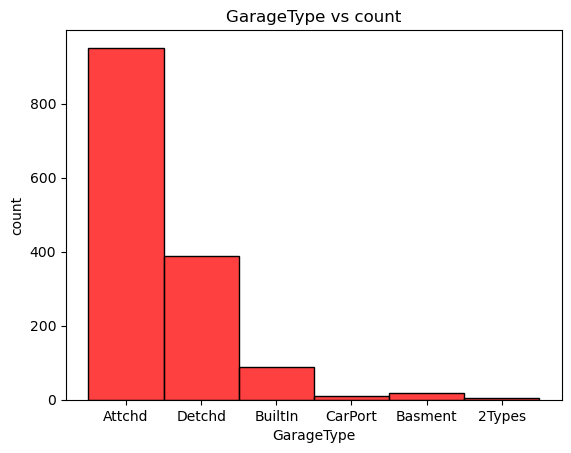

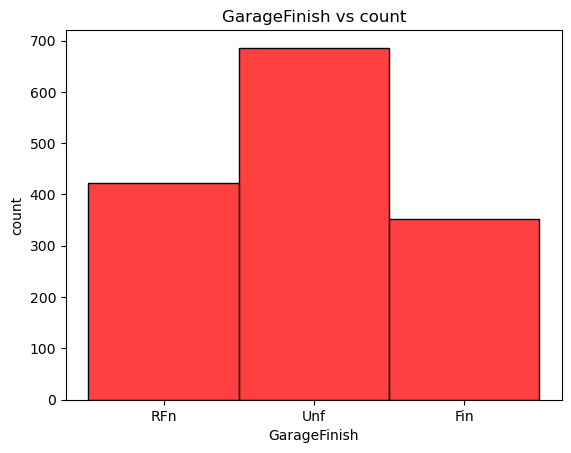

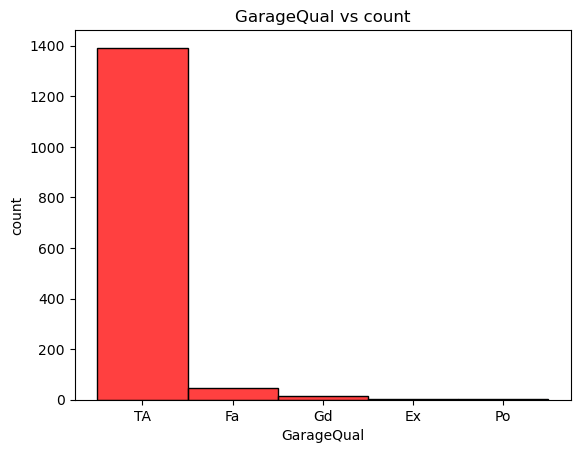

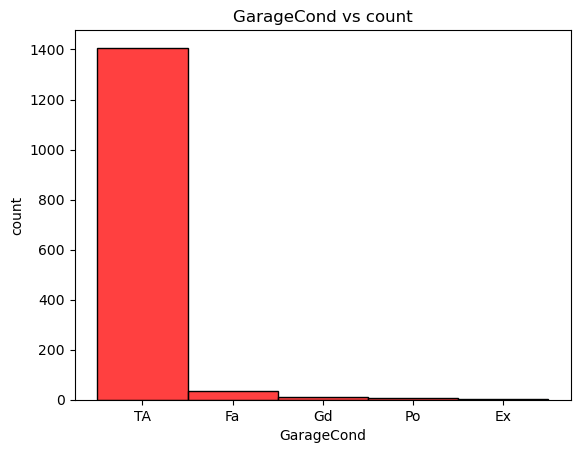

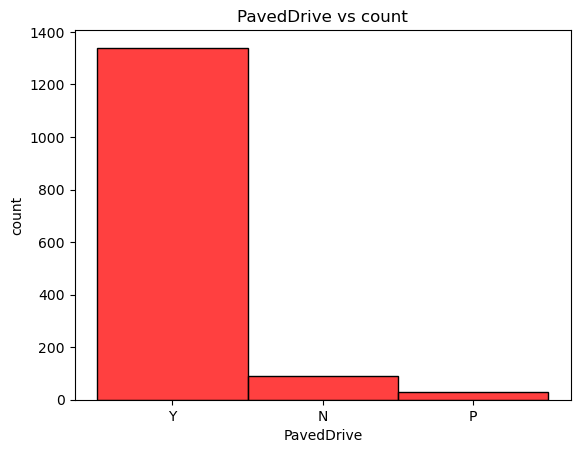

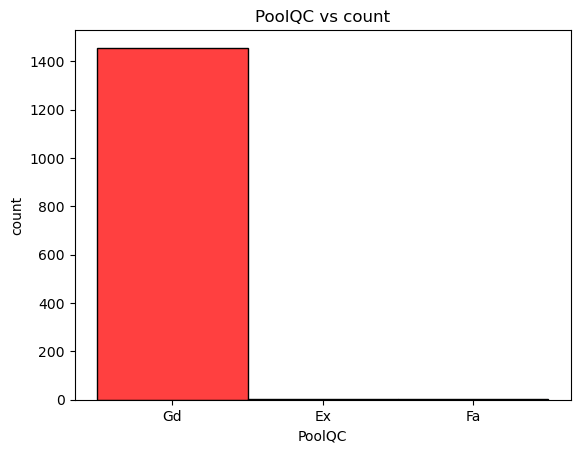

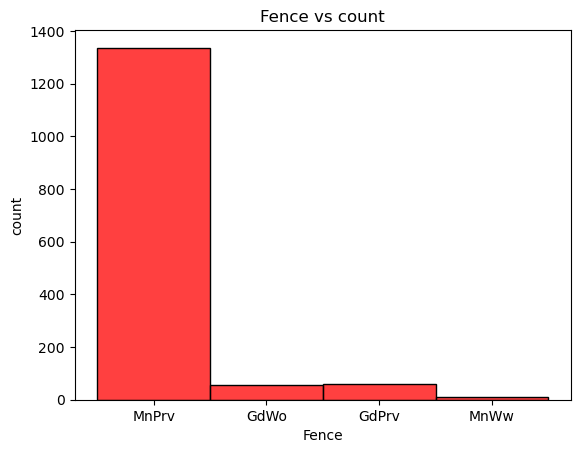

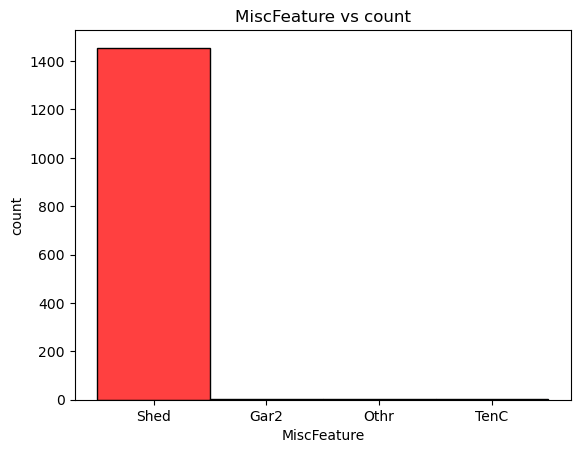

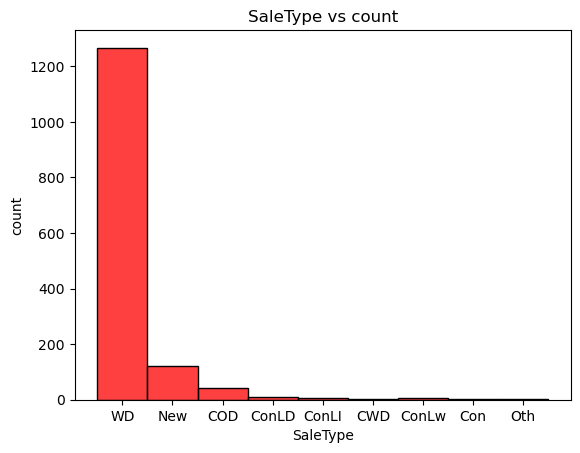

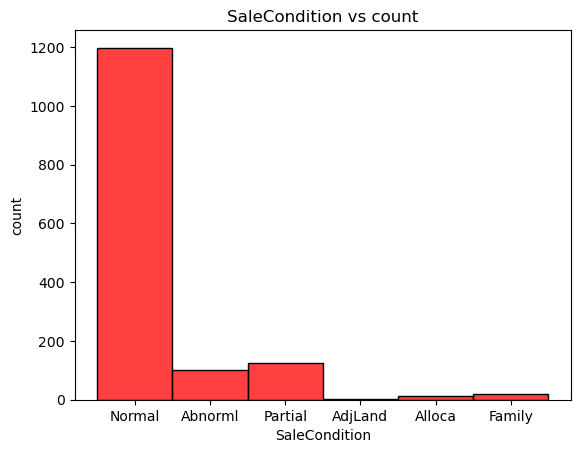

In [6]:
ob_col=data.select_dtypes(include=['object']).columns
for j in ob_col:
    if j in ['Neighborhood','Exterior2nd']:
        plt.figure()
        sb.histplot(data=data,x=j,color='g')
        plt.xlabel(j)
        plt.ylabel('count')
        plt.xticks(rotation=90)
        plt.title(f'{j} vs count')
        plt.show()
    else:
        plt.figure()
        sb.histplot(data=data,x=j,color='r')
        plt.xlabel(j)
        plt.ylabel('count')
        plt.title(f'{j} vs count')
        plt.show()

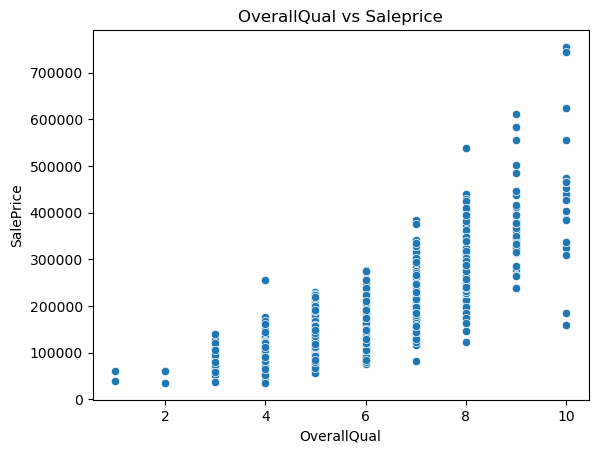

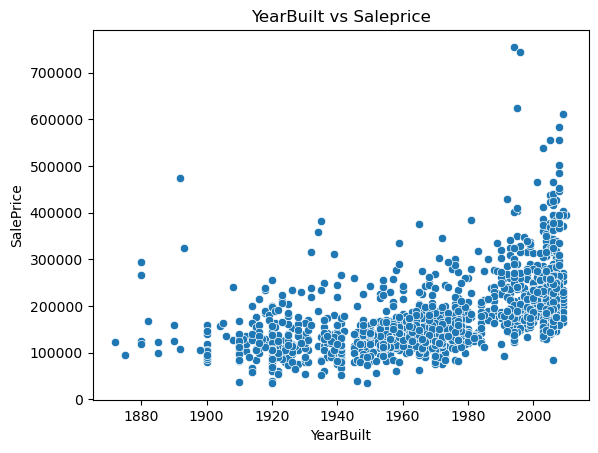

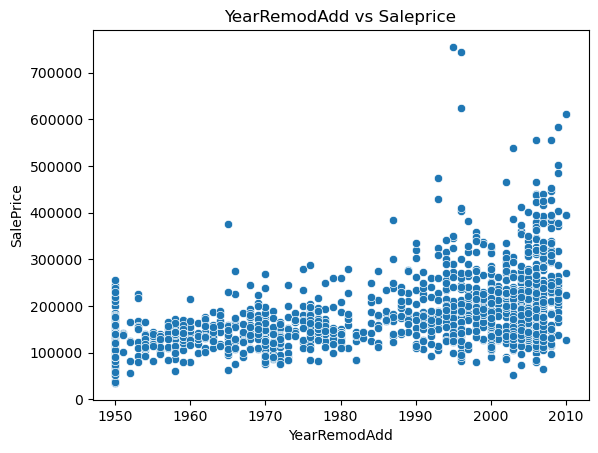

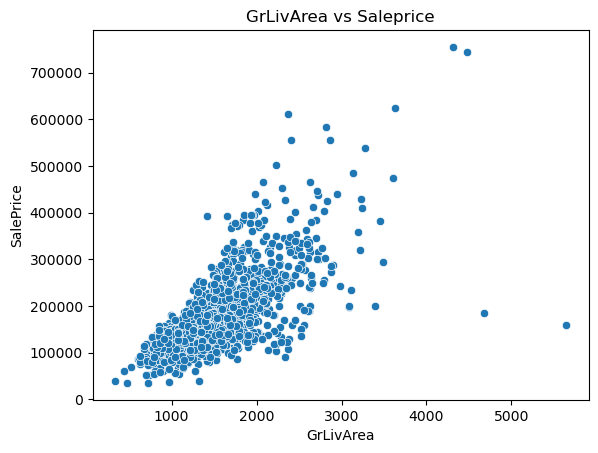

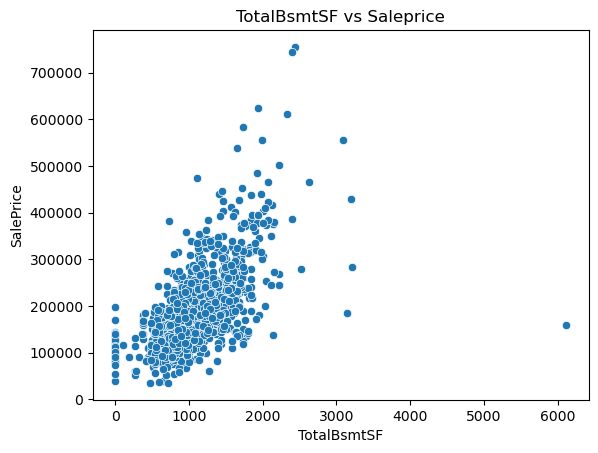

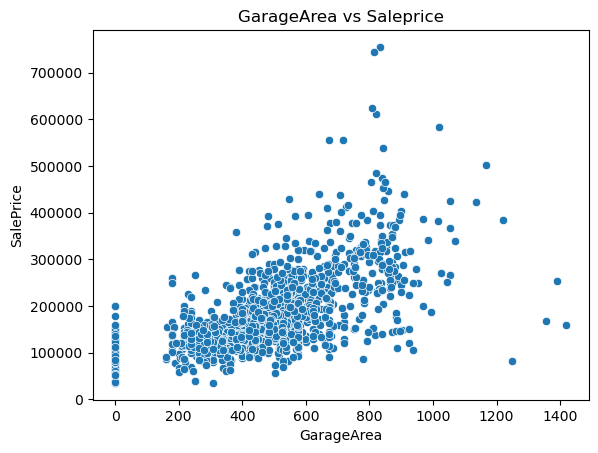

In [7]:
n_features=['OverallQual','YearBuilt','YearRemodAdd','GrLivArea','TotalBsmtSF','GarageArea']
for i1 in n_features:
    plt.figure()
    sb.scatterplot(data=data,x=i1,y='SalePrice')
    plt.xlabel(i1)
    plt.ylabel('SalePrice')
    plt.title(f'{i1} vs Saleprice')
    plt.show()

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


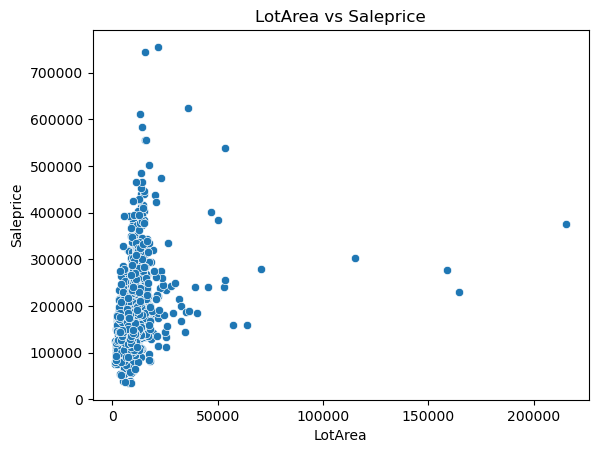

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


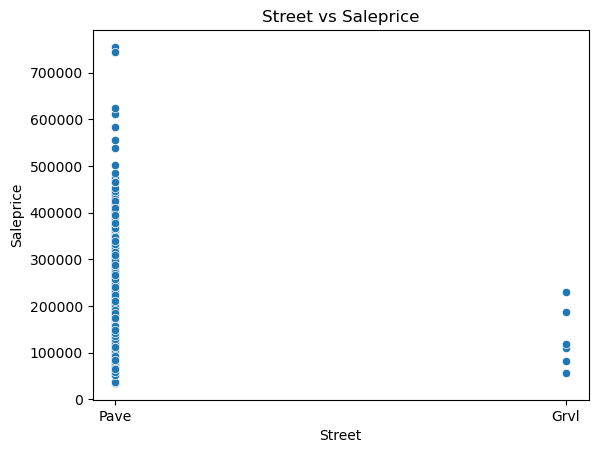

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


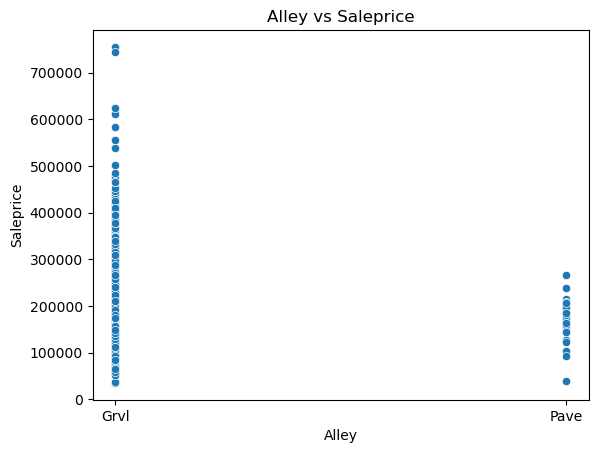

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


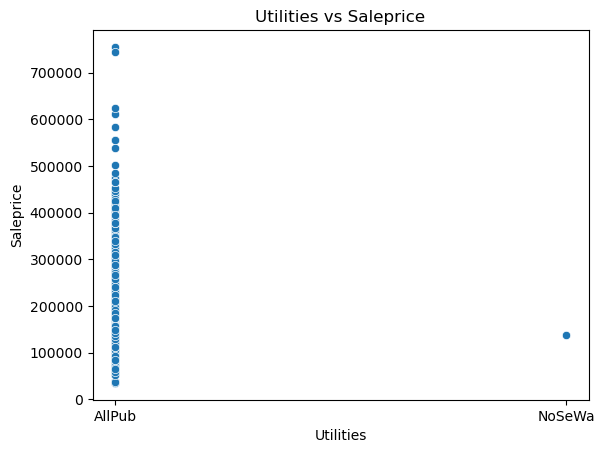

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


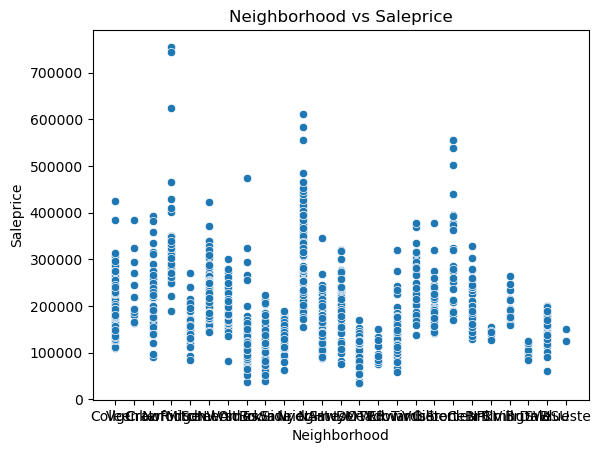

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


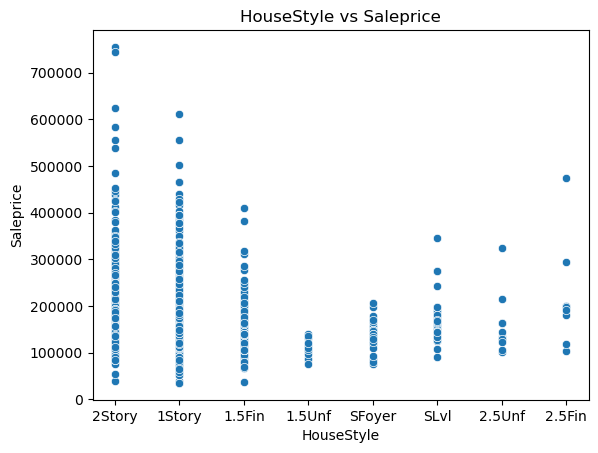

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


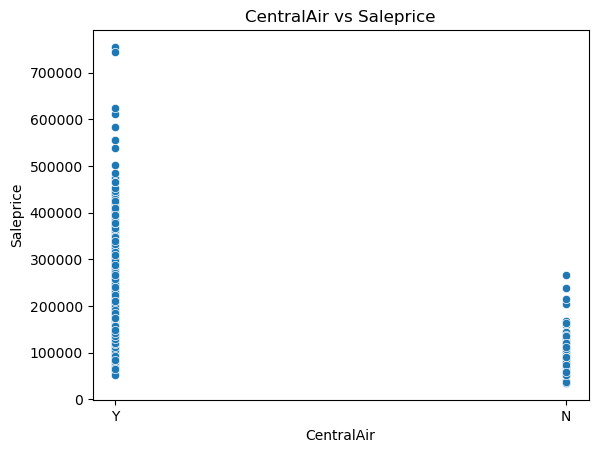

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


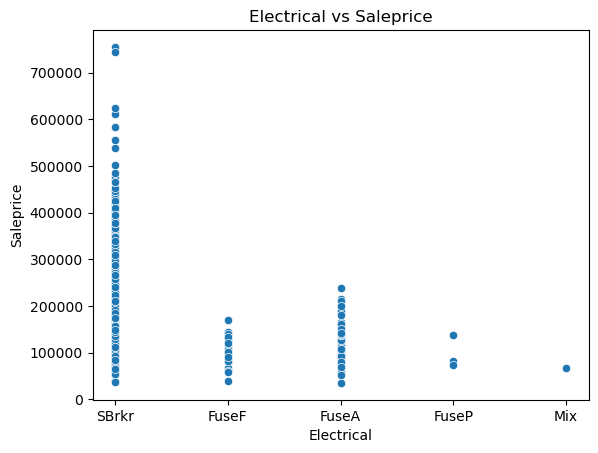

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


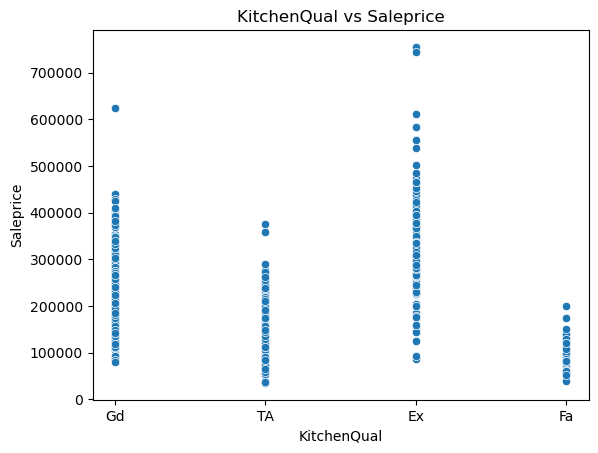

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


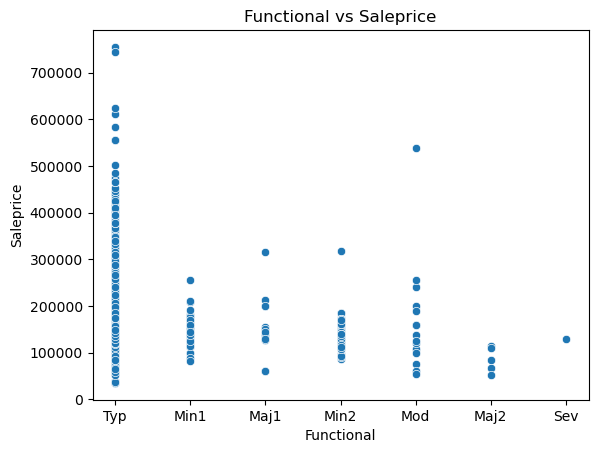

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


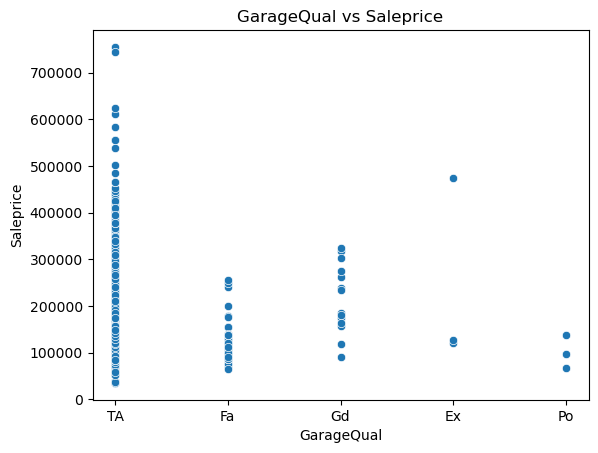

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


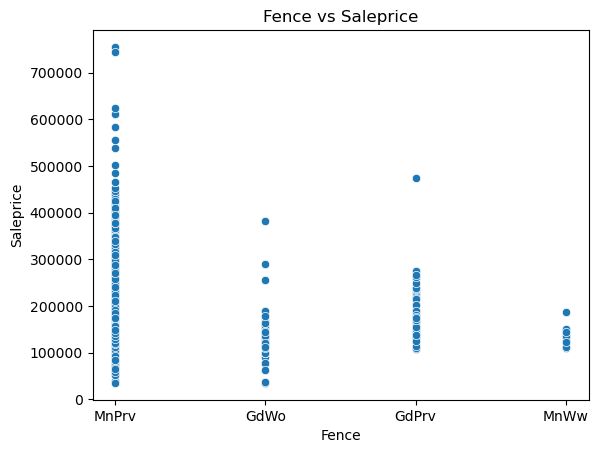

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_12932\2861721190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')


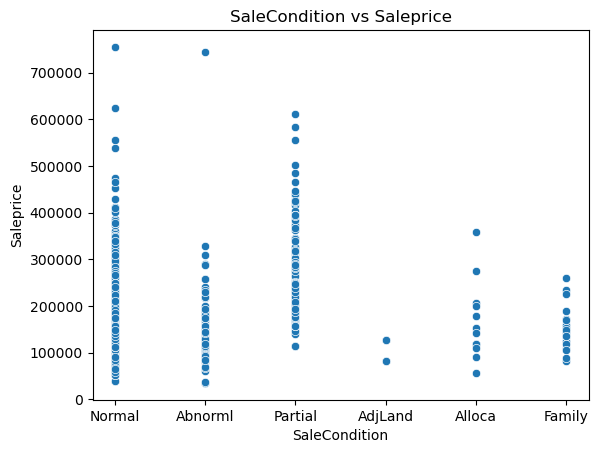

In [8]:
ob_features=['LotArea','Street','Alley','Utilities','Neighborhood','HouseStyle',
             'CentralAir', 'Electrical','KitchenQual','Functional','GarageQual','Fence','SaleCondition']
for j1 in ob_features:
    plt.figure()
    sb.scatterplot(data=data,x=j1,y='SalePrice',palette='viridis')
    plt.xlabel(j1)
    plt.ylabel('Saleprice')
    plt.title(f'{j1} vs Saleprice')
    plt.show()

In [9]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_encoded=data.select_dtypes(include=['object']).columns
for j2 in data_encoded:
    data[j2]=le.fit_transform(data[j2])

In [10]:
data.drop(['Id'],axis=1,inplace=True)

In [11]:
#Model prediction

array=data.values
x=array[:,0:79]
y=array[:,79]
test_size=0.33
seed=7
models=[]
models.append(('LR',LinearRegression()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVM',SVR()))
results=[]
names=[]
scoring='neg_mean_squared_error'

for name,model in models:
    kfold=model_selection.ShuffleSplit(n_splits=10,test_size=test_size,random_state=seed)
    result=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(result)
    names.append(name)
    msg='%s:%f'%(name,-result.mean())
    print(msg)

LR:1753726811.161441


C:\Users\Amrutha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Amrutha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Amrutha\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Amrutha\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^

KNN:2385215249.260332
CART:2028040134.856225
SVM:6923360242.019913


In [12]:
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipelines=[]
pipelines.append(('ScalerLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScalerKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScalerLCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScalerSVM',Pipeline([('Scaler',StandardScaler()),('SVM',SVR())])))
#results=[]
names=[]
for name,model in pipelines:
    kfold=model_selection.ShuffleSplit(n_splits=10,test_size=test_size,random_state=seed)
    cv_results=model_selection.cross_val_score(model,x,y,scoring=scoring,cv=kfold)
    #results.append(cv_results)
    names.append(name)
    msg='%s: %f'%(name,-cv_results.mean())
    print(msg)

ScalerLR: 1753726811.161314
ScalerKNN: 1717761918.412299
ScalerLCART: 2059448406.561410
ScalerSVM: 6920943111.707881


In [13]:
#Ensembling techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
ensembles=[]
ensembles.append(('RF',RandomForestRegressor()))
ensembles.append(('ET',ExtraTreesRegressor()))
ensembles.append(('AB',AdaBoostRegressor()))
ensembles.append(('GB',GradientBoostingRegressor()))
results=[]
names=[]
for name,model in ensembles:
    kfold=model_selection.ShuffleSplit(n_splits=10,test_size=test_size,random_state=seed)
    cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s: %f'%(name,-cv_results.mean())
    print(msg)

RF: 1009326973.968976
ET: 981574365.818510
AB: 1360351249.716724
GB: 978794024.157327


In [14]:
url1=r"D:\House Prices\test.csv"
test_data=pd.read_csv(url1)
print(test_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [15]:
#Missing values imputation on test data
n_col=test_data.select_dtypes(include=['int64','float64']).columns
for i in n_col:
    if test_data[i].isnull().sum()>0:
        test_data[i]=test_data[i].fillna(test_data[i].median())

ob_col=test_data.select_dtypes(include=['object']).columns
for j in ob_col:
    if test_data[j].isnull().sum()>0:
        test_data[j]=test_data[j].fillna(data[j].mode()[0])

In [16]:
print(test_data.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [17]:
#label encoding on test data
data_encoded=test_data.select_dtypes(include=['object']).columns
for j2 in data_encoded:
    test_data[j2] = test_data[j2].astype(str)
    test_data[j2]=le.fit_transform(test_data[j2])

In [18]:
test_data.drop(['Id'],axis=1,inplace=True)

In [19]:
#Final prediction
model=GradientBoostingRegressor()
model.fit(x,y)
GradientBoostingRegressor()

GradientBoostingRegressor()

In [20]:
pred_test=model.predict(test_data)

C:\Users\Amrutha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [21]:
submission=pd.read_csv(r"D:\House Prices\sample_submission.csv")
submission['SalePrice']=pred_test

In [22]:
submission.to_csv("D:\House Prices\Final_submission.csv",index=False)